# The current trends in the movie industry


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

# Read the dataset from Kaggle (https://www.kaggle.com/danielgrijalvas/movies)
df = pd.read_csv(r'C:\Users\alexa\datasets\movies.csv')

In [73]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [75]:
# Drop missing values to avoid errors
df.dropna(inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [76]:
# Now check for any remaining missing values 

for col in df.columns:
    missing_values = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_values*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [77]:
# Sort data by the gross earnings in descending order 
df_gross = df.sort_values(by='gross', ascending=False)
df_gross.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


<AxesSubplot:xlabel='year', ylabel='gross'>

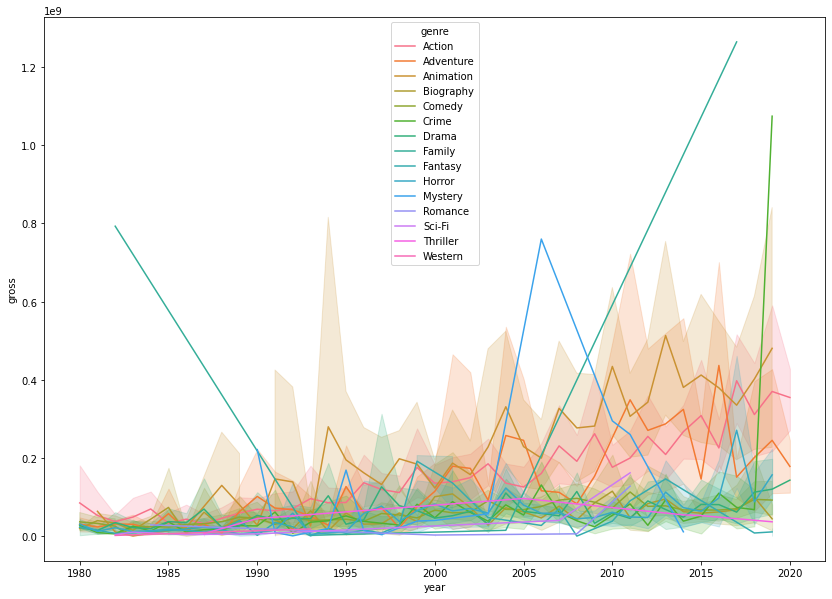

In [78]:
# Let's check trends in movie indudstry 
# Gross mean per genre and per year
genre_gross = df.groupby(['genre','gross']).mean()
# Convert to Dataframe
genre_gross_yearly = genre_gross.reset_index()
# Plot 
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,10)
 
sns.lineplot(x='year', y='gross', hue='genre', data=genre_gross_yearly) 


We can see some movie genres growing faster than others in terms of gross earnings. The Drama and Crime movies show very fast and significant increse in last years, the Action and Adventure genres also show stable growth. 

<AxesSubplot:xlabel='gross', ylabel='budget'>

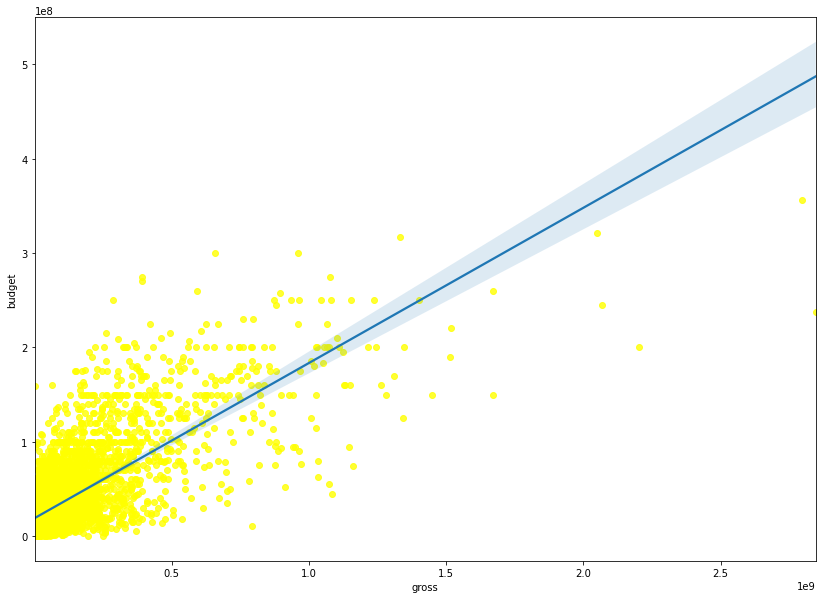

In [54]:
# Explore the linkage between budget expendidures and gross earnings
sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color": "yellow"})

There is a positive correlation between budget expendidures and gross earnings 

In [57]:
# Let' check correlation matrix 
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,0.154269,0.036367,0.965761,0.959855,-0.046733,0.287776,0.745905,0.805801,0.731509,0.144960,0.277488,0.947324,0.591834,0.048955,0.959855
rating,0.154269,1.000000,-0.091898,0.166475,0.156544,0.012393,0.104436,0.098462,0.115812,0.107458,0.020296,0.185162,0.161506,-0.011014,0.037179,0.156544
genre,0.036367,-0.091898,1.000000,0.037184,0.035980,-0.002437,0.023285,0.047288,0.033933,0.038918,-0.015182,0.073008,0.038616,0.009203,0.001462,0.035980
year,0.965761,0.166475,0.037184,1.000000,0.994020,-0.044981,0.312401,0.770497,0.825351,0.756341,0.142259,0.300621,0.980873,0.601720,0.050647,0.994020
released,0.959855,0.156544,0.035980,0.994020,1.000000,-0.045722,0.300098,0.771360,0.820646,0.755408,0.150028,0.285251,0.975591,0.607607,0.047289,1.000000
score,-0.046733,0.012393,-0.002437,-0.044981,-0.045722,1.000000,-0.009749,-0.022687,-0.035031,-0.009853,0.023278,-0.012642,-0.047041,-0.028285,0.026436,-0.045722
votes,0.287776,0.104436,0.023285,0.312401,0.300098,-0.009749,1.000000,0.192220,0.224093,0.179619,-0.045899,0.398519,0.286180,0.009102,0.106024,0.300098
director,0.745905,0.098462,0.047288,0.770497,0.771360,-0.022687,0.192220,1.000000,0.748875,0.682358,0.157134,0.106617,0.750911,0.552420,-0.011070,0.771360
writer,0.805801,0.115812,0.033933,0.825351,0.820646,-0.035031,0.224093,0.748875,1.000000,0.676284,0.158919,0.187041,0.806158,0.547126,0.032396,0.820646
star,0.731509,0.107458,0.038918,0.756341,0.755408,-0.009853,0.179619,0.682358,0.676284,1.000000,0.184619,0.108016,0.735612,0.527363,0.035494,0.755408


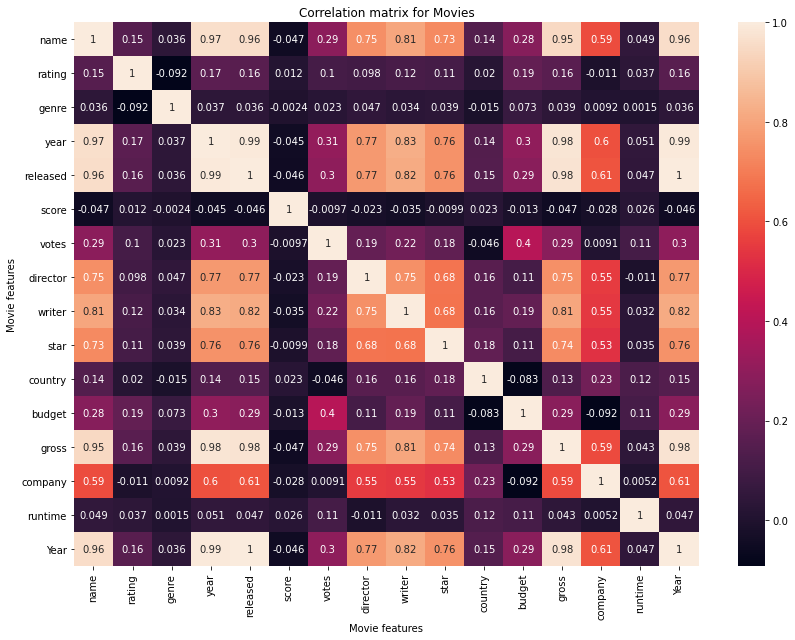

In [58]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [81]:
# Let's sort the results by correlation pairs
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs.head(10))

rating    genre      -0.116507
genre     rating     -0.116507
budget    company    -0.053573
company   budget     -0.053573
score     votes      -0.041981
votes     score      -0.041981
score     genre      -0.027402
genre     score      -0.027402
runtime   director   -0.026918
director  runtime    -0.026918
dtype: float64


In [86]:
# The correlation pairs that have a high correlation (> 0.5)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs.tail(20))

year      gross       0.996371
released  year        0.996490
year      released    0.996490
released  gross       0.998490
gross     released    0.998490
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


In [87]:
# Finally let's see the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64